# **E-Commerce Customer Service Satisfaction**

Project Done By:
1. Dheeraj Patel
2. Mayank Gupta
3. Rozi Fatma
4. Sadhana Balnad

Github Link: https://github.com/mayank021296/DL_Customer_Satisfaction_Project

# **Overview of Project**
This project focuses on predicting Customer Satisfaction (CSAT) scores using Deep Learning Artificial Neural Networks (ANN). In the context of e-commerce, understanding customer satisfaction through their interactions and feedback is crucial for enhancing service quality, customer retention, and overall business growth. By leveraging advanced neural network models, we aim to accurately forecast CSAT scores based on a myriad of interaction-related features, providing actionable insights for service improvement.

## About Dataset
The dataset captures customer satisfaction scores for a one-month period at an e-commerce platform called Shopzilla (a pseudonym). It includes various features such as category and sub-category of interaction, customer remarks, survey response date, category, item price, agent details (name, supervisor, manager), and CSAT score etc.

## **Project Background**
Customer satisfaction in the e-commerce sector is a pivotal metric that influences loyalty, repeat business, and word-of-mouth marketing. Traditionally, companies have relied on direct surveys to gauge customer satisfaction, which can be time-consuming and may not always capture the full spectrum of customer experiences. With the advent of deep learning, it's now possible to predict customer satisfaction scores in real-time, offering a granular view of service performance and identifying areas for immediate improvement.

## Data Description:

Unique id:	Unique identifier for each record

Channel name:	Name of the customer service channel

Category:	Category of the interaction

Sub-category:	Sub-category of the interaction

Customer Remarks:	Feedback provided by the customer

Order id:	Identifier for the order associated with the interaction

Order date time:	Date and time of the order

Issue reported at:	Timestamp when the issue was reported

Issue responded:	Timestamp when the issue was responded to

Survey response date:	Date of the customer survey response

Customer city:	City of the customer

Product category:	Category of the product

Item price:	Price of the item

Connected handling time:	Time taken to handle the interaction

Agent name:	Name of the customer service agent

Supervisor:	Name of the supervisor

Manager:	Name of the manager

Tenure Bucket:	Bucket categorizing agent tenure

Agent Shift:	Shift timing of the agent

CSAT Score:	Customer Satisfaction (CSAT) score

## **Project Goal**
The primary goal of this project is to develop a deep learning model that can accurately predict the CSAT scores based on customer interactions and feedback. By doing so, we aim to provide e-commerce businesses with a powerful tool to monitor and enhance customer satisfaction in real-time, thereby improving service quality and fostering customer loyalty.

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import zipfile

from sklearn.preprocessing import FunctionTransformer
import scipy.stats as stats

In [ ]:
#Extract, read data and Create data frame
zip_path = '/content/eCommerce_Customer_support_data.zip'
extract_path = '/content/'

# Extract zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Read CSV from extracted files
df = pd.read_csv('/content/Customer_support_data.csv')


In [ ]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
print("This data set has",df.shape[0],"rows and",df.shape[1],"columns.")

This data set has 85907 rows and 20 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

Based on data set info. This df has dumped with 85907 rows and 20 Columns.

Except 3 variable such as (Item_price, Connected_handling_time and CSAT Score) all other variables seems to be Object data type.

The data shows like non-null but as per count in some variable, many data might be fill with NAN, NA or some other charecters.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_price,17206.0,5660.774846,12825.728411,0.0,392.0,979.0,2699.75,164999.0
connected_handling_time,242.0,462.400826,246.295037,0.0,293.0,427.0,592.25,1986.0
CSAT Score,85907.0,4.242157,1.378903,1.0,4.0,5.0,5.00,5.0


Describe is actually an 5 point summary which will calculate for numerical values. So the reason only 3 variable got described.

* Item_price and connected_handling_time has its bell shape curve with a huge left skewness. and these both seems to have too many outlier, which can be clearly explained in visualization.

* CSAT variable has numerical Dtype but it looks like a categorical variable.


In [ ]:
for i in df.columns:
    print(df[i].value_counts())

Unique id
07c7a878-0d5a-42e0-97ef-de59abec0238    1
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f    1
b07ec1b0-f376-43b6-86df-ec03da3b2e16    1
c0d72065-e4c8-449b-9d55-cadb690b9c54    1
49e1675a-e890-4d27-93a0-51e67a44d86a    1
                                       ..
372b51a5-fa19-4a31-a4b8-a21de117d75e    1
11a3ffd8-1d6b-4806-b198-c60b5934c9bc    1
1cfde5b9-6112-44fc-8f3b-892196137a62    1
ba903143-1e54-406c-b969-46c52f92e5df    1
eb0d3e53-c1ca-42d3-8486-e42c8d622135    1
Name: count, Length: 85907, dtype: int64
channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64
category
Returns               44097
Order Related         23215
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/website              84
Onboarding related       65
Name: count, dtype: int64
Sub-category
Reverse Picku

In [ ]:
#finding duplicate datas
df.duplicated().sum()

np.int64(0)

In [ ]:
# finding null values and unique value counts
null_values= round(df.isnull().sum() * 100 / len(df),2)
unique_values=df.nunique()
analysis_df = pd.DataFrame({'column_name': df.columns,"unique_values": unique_values,'null_values_%': null_values,"data_type":df.dtypes})
analysis_df.reset_index(drop=True,inplace=True)
analysis_df


,column_name,unique_values,null_values_%,data_type
0,Unique id,85907,0.00,object
1,channel_name,3,0.00,object
2,category,12,0.00,object
3,Sub-category,57,0.00,object
4,Customer Remarks,18231,66.54,object
5,Order_id,67675,21.22,object
6,order_date_time,13766,79.96,object
7,Issue_reported at,30923,0.00,object
8,issue_responded,30262,0.00,object
9,Survey_response_Date,31,0.00,object


## Cleaning Data

By looking above analysis we could notice categories such as Unique ID, Customer Remark and Order_ID wont be usefull for further analysis so we suppose to drope those Variables.

Some object variables looks to be like time stamp columns. So the data type need to get change for those variables.

Some Object and float dtype variables has filled with NAN. Those needs to get filled as per needs.


In [ ]:
#Dropping not needed variables
df1=df.drop(["Unique id","Customer Remarks","Order_id","order_date_time"],axis=1)
df1.sample(n=2)

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
84599,Outcall,Returns,Fraudulent User,29/08/2023 16:42,31/08/2023 19:58,31-Aug-23,GAUTAM BUDDHA NAGAR,Books & General merchandise,532.0,NaN,Anita Roberts,Mia Patel,Emily Chen,0-30,Evening,5
42877,Inbound,Order Related,Seller Cancelled Order,16/08/2023 12:20,16/08/2023 12:28,16-Aug-23,NaN,NaN,NaN,NaN,Michelle Whitehead,Carter Park,Jennifer Nguyen,On Job Training,Evening,1


In [ ]:
#Replacing object dtype to timestamp dtype
col=['Issue_reported at','issue_responded','Survey_response_Date']
for i in col:
    df1[i]=pd.to_datetime(df1[i],dayfirst=True)
    print(i,": dtype =",df1[i].dtype)

Issue_reported at : dtype = datetime64[ns]
issue_responded : dtype = datetime64[ns]
Survey_response_Date : dtype = datetime64[ns]


In [ ]:
#Replacing null value according to needs
for i in df1.columns:
    if (df1[i].isnull().sum()>0 and df1[i].dtype=="object"):
        df1[i].fillna("Unknown",inplace=True)
        print(i, "Variable has object dtype, so it got Replace its null values to Unknown \n")
    elif (df1[i].isnull().sum()>0 and df1[i].dtype=="float64"):
        df1[i].fillna(df1[i].median(),inplace=True)
        print(i, "Variable has float dtype, so it got Replace its null values to columns median value \n")

Customer_City Variable has object dtype, so it got Replace its null values to Unknown 

Product_category Variable has object dtype, so it got Replace its null values to Unknown 

Item_price Variable has float dtype, so it got Replace its null values to columns median value 

connected_handling_time Variable has float dtype, so it got Replace its null values to columns median value 



In [ ]:
# finding null values and unique value counts
null_values1= round(df1.isnull().sum() * 100 / len(df),2)
unique_values1=df1.nunique()
analysis_df1 = pd.DataFrame({'column_name': df1.columns,"unique_values": unique_values1,'null_values_%': null_values1,"data_type":df1.dtypes})
analysis_df1.reset_index(drop=True,inplace=True)
analysis_df1

,column_name,unique_values,null_values_%,data_type
0,channel_name,3,0.0,object
1,category,12,0.0,object
2,Sub-category,57,0.0,object
3,Issue_reported at,30923,0.0,datetime64[ns]
4,issue_responded,30262,0.0,datetime64[ns]
5,Survey_response_Date,31,0.0,datetime64[ns]
6,Customer_City,1783,0.0,object
7,Product_category,10,0.0,object
8,Item_price,2789,0.0,float64
9,connected_handling_time,211,0.0,float64


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   channel_name             85907 non-null  object        
 1   category                 85907 non-null  object        
 2   Sub-category             85907 non-null  object        
 3   Issue_reported at        85907 non-null  datetime64[ns]
 4   issue_responded          85907 non-null  datetime64[ns]
 5   Survey_response_Date     85907 non-null  datetime64[ns]
 6   Customer_City            85907 non-null  object        
 7   Product_category         85907 non-null  object        
 8   Item_price               85907 non-null  float64       
 9   connected_handling_time  85907 non-null  float64       
 10  Agent_name               85907 non-null  object        
 11  Supervisor               85907 non-null  object        
 12  Manager                  85907 n

Now the data looks clean, lets move further for analysis.

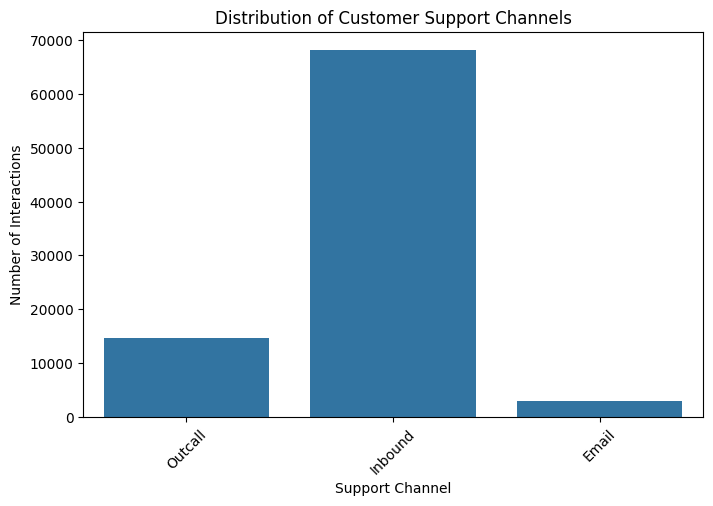

In [ ]:
# Visualizing customer support channels distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df1, x='channel_name')
plt.title("Distribution of Customer Support Channels")
plt.xlabel("Support Channel")
plt.ylabel("Number of Interactions")
plt.xticks(rotation=45)
plt.show()

This visualization shows that Inbound customer support channels is most frequently used. With this we can allocate resources efficiently.

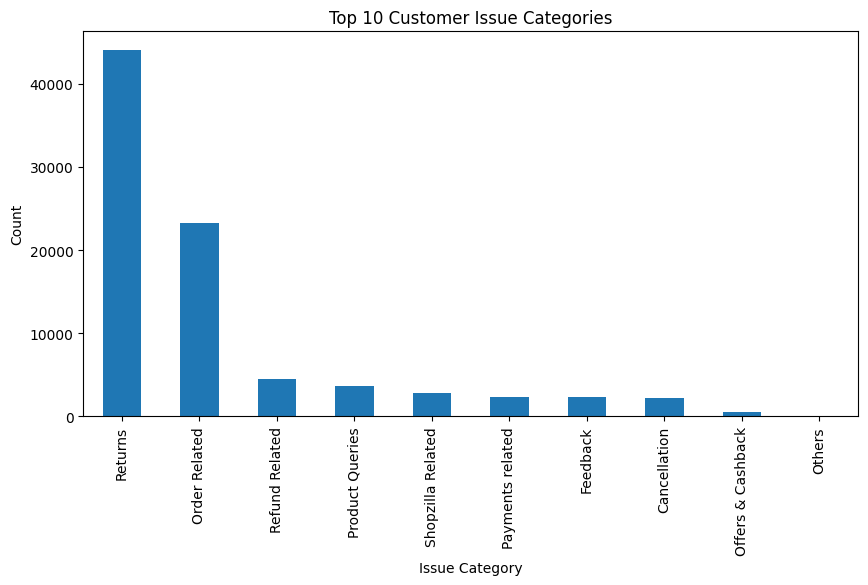

In [ ]:
# Top issue categories reported by customers
plt.figure(figsize=(10,5))
df1['category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Customer Issue Categories")
plt.xlabel("Issue Category")
plt.ylabel("Count")
plt.show()


Categories with higher frequency represent operational that three is bottlenecks for these categories and should be prioritized.

In [ ]:
df1.columns

Index(['channel_name', 'category', 'Sub-category', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
df1=df1[["channel_name","Tenure Bucket","Item_price","CSAT Score"]]

In [ ]:
df1_=pd.get_dummies(df1,columns=["channel_name","Tenure Bucket"],drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(df1_[["Item_price"]])

# transform train and test sets
df1_numerical_scaled = scaler.transform(df1_[["Item_price"]])
df1_numerical_scaled=pd.DataFrame(df1_numerical_scaled,columns=["Item_price"])

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(df1_[["Item_price","connected_handling_time"]])

# # transform train and test sets
# df1_numerical_scaled = scaler.transform(df1_[["Item_price","connected_handling_time"]])
# df1_numerical_scaled=pd.DataFrame(df1_numerical_scaled,columns=["Item_price","connected_handling_time"])

In [ ]:
df1_main=pd.concat([df1_,df1_numerical_scaled],axis=1).iloc[:,1:]
df1_main

,CSAT Score,channel_name_Inbound,channel_name_Outcall,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Item_price
0,5,False,True,False,False,False,True,-0.155302
1,5,False,True,False,False,True,False,-0.155302
2,5,True,False,False,False,False,True,-0.155302
3,5,True,False,False,False,True,False,-0.155302
4,5,True,False,False,False,False,False,-0.155302
...,...,...,...,...,...,...,...,...
85902,4,True,False,False,False,False,True,-0.155302
85903,5,True,False,False,False,True,False,-0.155302
85904,5,True,False,False,False,False,True,-0.155302
85905,4,True,False,False,False,True,False,-0.155302


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
X = df1_main.drop(columns=['CSAT Score'])
y = df1_main['CSAT Score'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Below is the deep neural network classification model using Keras.
The model takes structured input data, learns complex non-linear patterns using multiple dense layers with Leaky ReLU activation, and outputs a probability distribution over 6 classes using a softmax layer.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LeakyReLU

model = Sequential()

# Flatten layer
model.add(Flatten(input_shape=(7, 1)))

# First Dense layer with Leaky ReLU
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

# Second Dense layer with Leaky ReLU
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

# Third Dense layer with Leaky ReLU
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

# Fourth Dense layer with Leaky ReLU
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

# Fifth Dense layer with Leaky ReLU
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

# Output layer with softmax activation
model.add(Dense(6, activation='softmax'))

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,846 (265.02 KB)

 Trainable params: 67,846 (265.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Let's configures the neural network for training
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adagrad',metrics=['accuracy'])

Loss measures prediction error, Optimizer updates weights to reduce error, Accuravy gives us percentage of correct predictions.

In [ ]:
#Now trains the neural network on the training data. An epoch is the number of times a training dataset passes through an algorithm
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6676 - loss: 1.3319 - val_accuracy: 0.6957 - val_loss: 0.9635
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6953 - loss: 0.9600 - val_accuracy: 0.6953 - val_loss: 0.9537
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6944 - loss: 0.9560 - val_accuracy: 0.6954 - val_loss: 0.9509
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6933 - loss: 0.9538 - val_accuracy: 0.6956 - val_loss: 0.9487
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6964 - loss: 0.9438 - val_accuracy: 0.6956 - val_loss: 0.9478
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6959 - loss: 0.9478 - val_accuracy: 0.6953 - val_loss: 0.9472
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6953 - loss: 0.9466 - val_accuracy: 0.6955 - val_loss: 0.9468
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6936 - loss: 0.9473 -

In [ ]:
y_prob = model.predict(X_test)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6912466534745664

In [ ]:
!pip3 install gradio

In [ ]:
# Now we will create a web-based prediction interface using Gradio that allows users to input customer service features
# and receive a predicted Customer Satisfaction (CSAT) score

# Define the prediction function
import gradio as gr
def predict(feature1, feature2, feature3, feature4, feature5, feature6, feature7):
    # Convert "True"/"False" to 1/0
    features_np = [
        1 if feature1 == "True" else 0,
        1 if feature2 == "True" else 0,
        1 if feature3 == "True" else 0,
        1 if feature4 == "True" else 0,
        1 if feature5 == "True" else 0,
        1 if feature6 == "True" else 0,

        #float(feature7)  # Convert text input to float
    ]
    feature7 = np.array([[feature7]])
    feature7= scaler.transform(feature7)[0, 0]

    features_np = features_np + [feature7]
    features_np = np.array(features_np).reshape(1, -1)

    # Make prediction
    prediction = model.predict(features_np)
    predicted_class = np.argmax(prediction, axis=1)
    return str(predicted_class[0])  # Convert to string for display

# Create the Gradio interface
interface = gr.Interface(
    fn=predict,  # The function to call for prediction
    inputs=[
        gr.Radio(choices=["True", "False"], label="channel_name_Inbound"),
        gr.Radio(choices=["True", "False"], label="channel_name_Outcall"),
        gr.Radio(choices=["True", "False"], label="Tenure Bucket_31-60"),
        gr.Radio(choices=["True", "False"], label="Tenure Bucket_61-90"),
        gr.Radio(choices=["True", "False"], label="Tenure Bucket_>90"),
        gr.Radio(choices=["True", "False"], label="Tenure Bucket_On Job Training"),
        gr.Textbox(label="Item_price", type="text")  # Textbox for numerical input
    ],
    outputs=gr.Textbox(label="CSAT Score"),
    title="eCommerce Customer Service Satisfaction App",
    description="Please enter all the values to predict CSAT Score"
)

# Launch the interface
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://089637cfa93979d135.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


###KEY INSIGHTS FROM THE ANALYSIS

Based on the analysis and model results, several key insights were identified:

1. Delayed responses significantly reduce customer satisfaction

2. Certain issue categories consistently generate more complaints

3. A large portion of customers do not complete surveys, indicating feedback collection gaps

These insights provide direct guidance for improving customer support operations.

###BUSINESS IMPROVEMENT RECOMMENDATIONS

Based on the findings, I recommend the following improvements:

1. Reduce response times by implementing automated acknowledgments and AI-based chatbots for common queries.

2. Focus on improving processes for high-impact issue categories such as returns and product installation.

3. Increase survey participation by simplifying surveys and offering incentives.

4. Optimize customer support channels by investing more in high-performing channels and reducing load on inefficient ones.